<a href="https://colab.research.google.com/github/jaeyoungphysics/ML/blob/main/1_PyTorch_basics_%26_Linear_Regression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Basics (Tensor 사용법)**

In [ ]:
# 파이토치 import 하기
import torch

PyTorch는 매우 편리한 tensor 연산을 지원한다

(tensor : 일반적인 n차원 배열을 나타내는 PyTorch의 자료형)



### **1)   1-dim Tensor (a.k.a vector)**



In [ ]:
# 6개의 원소를 가지는 1차원 배열 (= 1차원 텐서, 혹은 벡터라고 부름) 생성
v = torch.tensor([1., 2., 3., 4., 5., 6.,])

In [ ]:
v

tensor([1., 2., 3., 4., 5., 6.])

In [ ]:
# dim()을 사용해 텐서 자료형의 차원을 확인 가능
v.dim()

1

In [ ]:
# shape, 혹은 size() 를 사용해 텐서의 크기 확인 가능
print(v.shape)
print(v.size())

torch.Size([6])
torch.Size([6])


텐서의 각 원소는 일반적인 numpy 배열과 같이 인덱스를 통한 접근, 슬라이싱 등이 가능하다

In [ ]:
print(v[0], v[1], v[-1]) # 인덱스를 사용한 원소 접근
print(v[1:3], v[3:-1])   # 슬라이싱, [x:y] > 인덱스 기준 x번 원소부터 시작 ~ y-1번 원소까지 표시
print(v[:2] , v[3:])     # 슬라이싱, [:x] > 인덱스 기준 첫 원소부터 x-1번 원소까지 표시, [x:] > 인덱스 기준 x번 원소부터 끝까지 표시

tensor(1.) tensor(2.) tensor(6.)
tensor([2., 3.]) tensor([4., 5.])
tensor([1., 2.]) tensor([4., 5., 6.])


### **2)   2-dim Tensor (a.k.a matrix)**


In [ ]:
# 4x3 구조를 가진 2차원 배열 (= 2차원 텐서, 혹은 행렬) 생성
m = torch.tensor([[1., 2., 3.],
                  [4., 5., 6.],
                  [7., 8., 9.],
                  [10., 11., 12.]
                  ])

In [ ]:
m

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])

In [ ]:
# 마찬가지로 dim()을 통해 차원을 확인 가능, 2차원 텐서임을 확인 가능
m.dim()

2

In [ ]:
# shape, size() 통한 크기 확인도 똑같이 가능, 4x3 크기를 확인 가능
print(m.shape)
print(m.size())

torch.Size([4, 3])
torch.Size([4, 3])


In [ ]:
# 2차원 텐서도 마찬가지로 인덱스를 통한 원소 접근과 슬라이싱이 가능하다
print(m[:, :])         # 모든 원소 표시

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
print(m[:, 2])         # 모든 행의 2번 인덱스 원소만 슬라이싱
print(m[:, 2].dim())   # 이 경우의 차원, 4개의 원소를 가지는 1차원 텐서이기에 dim() = 1
print(m[:, 2].size())  # 이 경우의 크기, 4개의 원소를 가지는 1차원 텐서로 표현

tensor([ 3.,  6.,  9., 12.])
1
torch.Size([4])


In [ ]:
print(m[:, :2])         # 모든 행의 2번 인덱스 전까지 원소 슬라이싱
print(m[:, :2].dim())   # 이 경우 4x2의 크기를 가진 2차원 텐서이기에 dim() = 2
print(m[:, :2].size())  # 이 경우 4x2의 크기를 가짐을 확인 가능

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])
2
torch.Size([4, 2])


In [ ]:
print(m[0, :])          # 0번 행의 모든 열 원소만 슬라이싱
print(m[:2, :2])        # 2번 행, 열 전까지의 원소만 슬라이싱

tensor([1., 2., 3.])
tensor([[1., 2.],
        [4., 5.]])


마찬가지 방법으로 3차원 이상 배열 또한 생성, 조작 가능하다

### **3)   행렬 연산 시의 Broadcasting**


수학적으로 연산이 불가능한 행렬 사이의 연산(행렬 차원이 맞지 않는 곱셈, 덧셈 등)을 수행할 시, 자동으로 텐서의 차원을 맞춰주는 기능

편리하지만 때로 심각한 오류 발생 가능성 또한 있으므로 주의

In [ ]:
# 크기가 같은 텐서 사이 덧셈
m1 = torch.tensor([[3, 3]])         # 크기 1x2
m2 = torch.tensor([[2, 2]])         # 크기 1x2
print(m1 + m2)

tensor([[5, 5]])


In [ ]:
# 크기가 다른 텐서 사이 덧셈
m1 = torch.tensor([[1., 2.]])      # 크기 1x2
m2 = torch.tensor([3])             # 크기 1x1
print(m1 + m2)                     # m2를 브로드캐스팅을 통해 (3, 3)으로 변환 후 덧셈

tensor([[4., 5.]])


일반적으로 (1, 2) + 3 이라는 연산을 수행할 수 없지만, PyTorch는 자동으로 3을 (3, 3)으로 바꾼 후 덧셈을 수행한다

In [ ]:
# 2x1 텐서 + 1x2 텐서
m1 = torch.tensor([[1, 2]])
m2 = torch.tensor([[3], [4]])
print(m1 + m2)

tensor([[4, 5],
        [5, 6]])


마찬가지로,  
$
(1 ,2) + \left(\begin{array}{r}3\\4\end{array}\right)
$
의 경우

$
(1, 2) \rightarrow \left(\begin{array}{rr}1&2\\1&2\end{array}\right)
$

$
\left(\begin{array}{r}3\\4\end{array}\right) \rightarrow \left(\begin{array}{rr}3&3\\4&4\end{array}\right)
$ 로 변환 후 덧셈을 수행



행렬 곱셈 연산에는 두 가지 종류가 있다.

일반적인 행렬 곱셈과 똑같은 matmul() = mm() , 혹은 원소별로 곱셈을 하는 mul() = *

행렬 곱셈 연산중 mul()의 경우 마찬가지로 브로드캐스팅이 적용된다

In [ ]:
# 일반적인 행렬 곱셈을 수행하는 matmul(), 혹은 줄여서 mm()
m1 = torch.tensor([[1, 2], [3, 4]])
m2 = torch.tensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape)  # 2 x 2
print('Shape of Matrix 2: ', m2.shape)  # 2 x 1
print(m1.matmul(m2))                    # 2 x 1
print(m1.mm(m2))                        # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5],
        [11]])
tensor([[ 5],
        [11]])


In [ ]:
 # matmul() 혹은 mm()의 경우 브로드캐스팅이 적용되지 않는다
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1, 2]])
print('Shape of Matrix 1: ', m1.shape)  # 2 x 2
print('Shape of Matrix 2: ', m2.shape)  # 1 x 2
print(m1.matmul(m2))                    # 계산 시 에러 발생

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([1, 2])


RuntimeError: ignored

In [ ]:
print(m1.mm(m2))                        # 계산 시 에러 발생

In [ ]:
# 행렬 원소 사이 곱을 수행하는 mul(), 혹은 * 연산자, 이 경우 브로드캐스팅이 적용된다
m1 = torch.tensor([[1, 2], [3, 4]])
m2 = torch.tensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

$
\left(\begin{array}{rr}1&2\\3&4\end{array}\right) * \left(\begin{array}{r}1\\2\end{array}\right)
$

여기서 * 은 mul() 과 똑같은 연산을 한다

이 경우
$
\left(\begin{array}{r}1\\2\end{array}\right) \rightarrow \left(\begin{array}{rr}1&1\\2&2\end{array}\right)
$ 로 바꾼 후

$
\left(\begin{array}{rr}1&2\\3&4\end{array}\right) * \left(\begin{array}{rr}1&1\\2&2\end{array}\right) = \left(\begin{array}{rr}1\times1&2\times1\\3\times2&4\times2\end{array}\right) = \left(\begin{array}{rr}1&2\\6&8\end{array}\right)
$ 원소별로 곱셈을 수행한다

### **4)   다양한 텐서 계산 Tool**


In [ ]:
# 텐서 원소들의 평균 계산
t = torch.tensor([1., 2.])
print(t.mean())                # 원소 평균 계산

tensor(1.5000)


In [ ]:
t = torch.tensor([[1., 2.], [3., 4.]])
print(t)
print(t.mean())                 # 마찬가지로 원소 평균 계산
print(t.mean(dim=0))            # 첫 번째 차원(= 행)을 제거하고 평균 계산, 즉 같은 열 다른 행의 원소끼리 평균 계산
print(t.mean(dim=1))            # 두 번째 차원(= 열)을 제거하고 평균 계산, 즉 같은 행 다른 열의 원소끼리 평균 계산
print(t.mean(dim=-1))           # 마지막 차원(= 2차원 배열이므로 여기선 열)을 제거하고 평균 계산, 즉 같은 행 다른 열의 원소끼리 평균 계산

tensor([[1., 2.],
        [3., 4.]])
tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


In [ ]:
# 원소 합 계산
t = torch.tensor([[1., 2.], [3., 4.]])
print(t)
print(t.sum())       # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0))  # 행을 제거
print(t.sum(dim=1))  # 열을 제거
print(t.sum(dim=-1)) # 마지막 차원(= 열)을 제거

tensor([[1., 2.],
        [3., 4.]])
tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [ ]:
# 최대값을 가지는 원소 혹은 그 원소의 인덱스 반환
t = torch.tensor([[1., 2.], [3., 4.]])
print(t)

print(t.max())        # 원소 중 최대값인 4를 반환

tensor([[1., 2.],
        [3., 4.]])
tensor(4.)


In [ ]:
print(t.max(dim=0))   # 행 삭제, 각 열에서 가장 큰 값을 반환, 각 열의 가장 큰 값이 몇 번째 열에 있는지 인덱스 또한 반환

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


첫번째 열에서 0번 인덱스는 1, 1번 인덱스는 3 \\
두번째 열에서 0번 인덱스는 2, 1번 인덱스는 4 \\
다시 말해 3과 4의 인덱스는 [1, 1]

In [ ]:
# max와 argmax를 따로 표시
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


### **5)   텐서의 크기를 조작하는 View**



In [ ]:
import numpy as np
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])               # (2x2x3) 크기를 가지는 numpy 배열 생성
ft = torch.FloatTensor(t)                   # numpy 배열을 받아와 PyTorch 텐서로 사용 가능

In [ ]:
print(ft)
print('\n')
print(ft.size())                            # 2x2x3 크기를 가진 텐서

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])


torch.Size([2, 2, 3])


In [ ]:
# 텐서 크기를 바꿔주는 view() 사용해 2차원 텐서로 변경, -1은 원소 개수에 맞게 PyTorch가 알아서 크기 설정하라는 뜻
print(ft.view([-1, 3]))                       # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)                 # 2x2x3 크기의 3차원 텐서가 4x3 크기의 2차원 텐서로 변경됨

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


### **6)   크기 1인 차원을 제거하는 squeeze()**


In [ ]:
ft = torch.tensor([[0.], [1.], [2.]])
print(ft)
print(ft.shape)          # 크기 3x1 을 가지는 텐서 생성

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.squeeze())       # 텐서에서 1의 크기를 가지는 차원을 제거, 크기 3의 벡터로 변환
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### **7)   크기 1인 차원을 추가하는 unsqueeze()**


In [ ]:
ft = torch.tensor([0., 1., 2.])
print(ft)
print(ft.size())                     # 크기 3을 가지는 텐서 생성

tensor([0., 1., 2.])
torch.Size([3])


In [ ]:
print(ft.unsqueeze(0))               # 0번 차원(= 첫 번째 차원)에 크기 1을 추가, 즉 3 > 1x3 차원 텐서로 만든다
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
# 동일한 연산을 view()로도 수행 가능
print(ft.view(1, -1))                # 크기 3을 가지는 텐서를 (1, ?) 크기를 가지도록 변경
print(ft.view(1, -1).shape)          # 원소 개수가 같아야 하므로 (1, 3) 크기로 바뀐다

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
print(ft.unsqueeze(1))               # 1번 차원(= 두 번째 차원)에 크기 1을 추가, 즉 3 > 3x1 차원 텐서로 만든다
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


### **8)   텐서 연결하기 (concatenate)**


In [ ]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.tensor([[5., 6.], [7., 8.]])

In [ ]:
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [ ]:
# cat()을 사용해 두 텐서 합치기 가능, 여기서 dim 인자를 조절해 몇 번째 차원으로 합칠것인지 결정 가능
print(torch.cat([x, y], dim=0))     # 0번 차원(= 행)을 확장하는 방향으로 텐서 합치기

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [ ]:
print(torch.cat([x, y], dim=1))     # 1번 차원(= 열)을 확장하는 방향으로 텐서 합치기

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [ ]:
# cat() 말고 stack()을 사용하는 편이 편리할 때도 있다
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])           # 모두 크기 2를 가지는 텐서

In [ ]:
torch.cat([x,y,z], dim=0)               # 애초에 0번 차원밖에 없으므로, dim=0를 명시하지 않아도 작동한다

tensor([1., 4., 2., 5., 3., 6.])

In [ ]:
torch.cat([x,y], dim=1)                 # 그러나 이를 2차원 배열로 쌓으려 하면 오류가 발생한다. 애초에 차원이 하나밖에 없기에 1번 차원(= 열)을 찾을 수 없기 때문

IndexError: ignored

In [ ]:
print(torch.stack([x, y, z]))            # 이 경우 stack() 을 사용하면 훨씬 편리하게 합치기가 가능하다

In [ ]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))  # 동일한 작업을 cat()으로 구현하면 복잡하다

In [ ]:
print(torch.stack([x, y, z], dim=1))     # 늘리기 원하는 차원을 명시해서 합치는 것 또한 가능

### **9)   1 혹은 0 으로 채워진 텐서 생성**


In [ ]:
# 때로는 기존 텐서와 동일한 크기를 가지고 내용물은 비어있는 텐서가 필요한 경우가 있다
# 이 경우 zeros_like을 사용해 동일한 크기를 가지고 내용은 0으로 채운 텐서 생성이 가능

x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

In [ ]:
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

In [ ]:
# 마찬가지로 같은 크기를 지니며 원소가 모두 1인 텐서도 생성 가능하다

print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기

### **10)   덮어쓰기 연산**


In [ ]:
# 2x2 크기를 가진 텐서 생성 후 x에 저장

x = torch.FloatTensor([[1, 2], [3, 4]])

print(x.mul(2.)) # 원소에 곱하기 2를 수행한 결과를 출력
print(x)         # 기존의 값 출력

In [ ]:
# 변수 뒤에 _ 를 붙여서 연산을 하면서 그 값으로 변수를 덮어쓰는것이 가능하다

print(x.mul_(2.))  # 원소에 곱하기 2를 수행한 결과를 변수 x에 값을 저장함과 동시에 결과를 출력
print(x)           # 기존의 값 출력, 원소 곱하기 2가 된 값으로 업데이트 된 것을 확인 가능

# **Function과 Class의 차이**

### **1) Function을 이용해 덧셈 도구 만들기**

In [ ]:
result = 0

전역 변수 result 를 선언, num 만큼 result에 더하는 function 만들기

In [ ]:
def add(num):
  global result
  result += num
  return result

result = 0 에 3, 4를 순서대로 더하여 출력한 결과

In [ ]:
print(add(3))
print(add(4))

3
7


덧셈 도구 두 개를 사용하고 싶으면 function을 두 번 만들어야 한다

In [ ]:
result1 = 0
result2 = 0

In [ ]:
def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

add1 , add2 라는 이름의 덧셈 함수를 만들어 각각 연산이 따로 진행되는 것을 확인 가능\
function을 이용해 도구를 여러개 만드려면 원하는 만큼 반복해서 function을 def 해주어야 한다

In [ ]:
print(add1(3))
print(add1(4))

3
7


In [ ]:
print(add2(3))
print(add2(7))

3
10


### **2) Class를 사용해 덧셈 도구 만들기**

In [ ]:
class Calculator:
    def __init__(self): # 객체(도구) 생성 시 실행되는 초기화 함수(생성자), 여기서는 지역변수 result를 0으로 초기화 한다.
        self.result = 0

    def add(self, num): # 객체(도구) 생성 후 사용할 수 있는 함수
        self.result += num
        return self.result

Class를 선언한 후에는 이를 사용해 객체(도구)를 원하는 대로 선언 할 수 있다\
예를 들어, cal1 이라는 객체(도구)를 아래와 같이 만들 수 있다

In [ ]:
cal1 = Calculator()

마찬가지로, cal2 라는 객체(도구) 또한 간단히 선언 가능하다

In [ ]:
cal2 = Calculator()

cal1, cal2 각각 서로 영향을 주지 않고 독립적으로 연산을 하는 것을 확인 가능하다

In [ ]:
print(cal1.add(3))
print(cal1.add(4))

3
7


In [ ]:
print(cal2.add(3))
print(cal2.add(7))

3
10


Function을 이용해 여러개의 덧셈 도구를 만드려면 매번 새로 선언해주어야 하는 반면, Class를 이용하면 간단히 여러개의 도구를 만들 수 있다

# **Linear Regression (선형 회귀)**

### **1) Linear Regression의 이론적 배경**

선형 회귀 이론에 대해서 이해하고, 파이토치(PyTorch)를 이용하여 선형 회귀 모델을 만들어본다

* **데이터에 대한 이해(Data Definition)**\
학습할 데이터에 대한 정의

* **가설 수립(Hypothesis)**\
가설을 수립하는 방법

* **손실 함수(Loss function)**\
학습 데이터로 모델을 개선시키기 위한 손실(loss)의 이해

* **경사 하강법(Gradient Descent)**\
학습을 위한 핵심 알고리즘인 경사 하강법(Gradient Descent)의 이해

##### **1-1) Data Definition**

예를 들어 아래와 같은 공부시간 - 점수에 대한 데이터를 통해 선형회귀를 진행한다고 하자

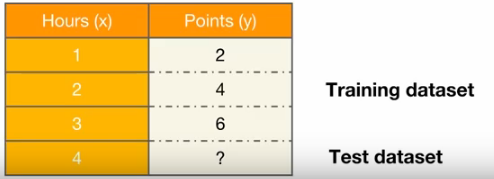

어떤 학생이 4시간 공부 시 점수는 몇 점인지 알려면 이미 알고 있는 정보를 이용해야한다

모델이 예측을 위한 학습에 쓰는 데이터를 Training dataset, 학습한 후 잘 작동하는지 판별하는 데이터를 Test dataset 이라 한다

PyTorch를 이용해 모델 학습을 진행 시, tensor의 형태로 dataset을 전달하여 학습한다

여기서는 입력(= x = 공부시간), 출력 (= y = 점수)를 tensor 형태로 만들어야 학습이 가능하다

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]]) # 입력 데이터 = 공부 시간
y_train = torch.FloatTensor([[2], [4], [6]]) # 출력 데이터 = 점수

In [ ]:
print(x_train)
print(y_train)

학습을 위해 아래와 같은 tensor를 선언했다

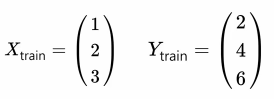

##### **1-2) Hypothesis**

머신 러닝에서 데이터 학습, 분석을 위한 식을 세울때 이 식을 가설(Hypothesis)라고 한다

보통 머신 러닝에서 가설은 임의로 추측해서 세워보는 식이거나, 혹은 경험적으로 알고 있는 식일 수도 있다

맞는 가설이 아니라고 판단되면 계속 수정해나가게 된다

선형 회귀의 경우 이미 잘 알려진 식을 Hypothesis롤 사용한다

선형 회귀는 데이터와 잘 맞는 직선 식을 찾는 작업이므로, 해당하는 Hypothesis는 아래와 같은 직선의 방정식이다

$y= Wx+b$

혹은 Hypothesis의 H를 따와 아래와 같이 적기도 한다

$H(x)= Wx+b$

이 때, $x$ 와 곱해지는 $W$를 가중치 (weight), $b$를 편향 (bias) 라고 한다

##### **1-3) Loss Function**

손실 함수는 여러가지 이름이 있다

비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)

주로 비용 함수, 손실 함수를 많이 쓴다

예를 들어 다음과 같은 데이터가 있다고 하자

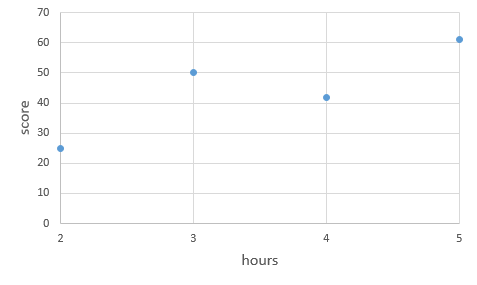

이 데이터와 가장 잘 맞는 하나의 직선을 그리고자 한다

이를 위해 아래와 같이 세 가지 직선을 그려본다

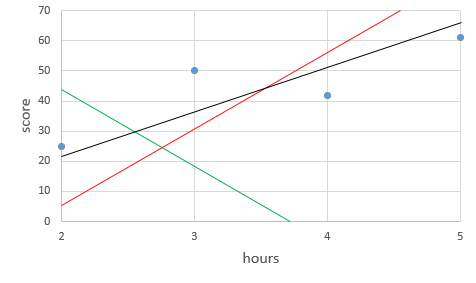

위 세 가지 직선은 각각 서로 다른 $W$와 $b$ 값을 가지고 있다

이 세 직선 중 데이터를 가장 잘 반영한 직선은 무엇일까?

눈으로 보기에 검정 직선이 가장 잘 반영한 것 같지만, 이를 보다 구체적으로 표현하기 위해 오차(error) 를 사용한다

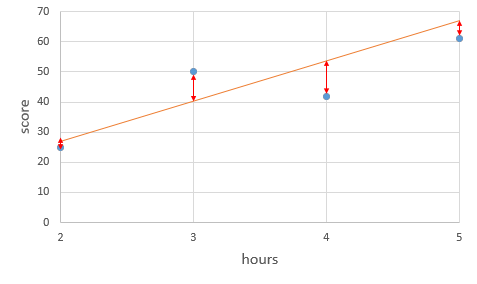

위 그림에서, 빨간 화살표들은 실제 데이터 포인트와 선형 회귀를 통해 얻은 직선(예측값들의 모임) 사이의 차이를 나타낸다

이 예시에서 주황 직선은 $y = 13x + 1$ 이고, 전체 error = (실제 - 예측) 는 다음과 같이 계산된다

|hours($x$)|2|3|4|5|
|----------|-|-|-|-|
|실제 값    |25|50|42|61|
|예측 값    |27|40|53|66|
|$error$  |-2|10|-11|-5| 

우리는 각 오차의 값보다, 모든 데이터에 대한 오차의 절대적인 크기가 작아지기를 원한다

따라서 아래와 같은 식으로 모든 데이터 포인트에 대한 절대적인 오차 크기의 평균을 구할 수 있다



$\frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2 = 250 / 4 = 62.5$

여기서 n은 데이터 포인트의 개수( = 4) 이다

이런 방식으로 구한 오차를 평균 제곱 오차 (Mean Squared Error , MSE) 라고 한다

따라서, 우리는 이 MSE값을 최소로 만드는 $W , b$ 값을 찾아 이를 이용해 직선의 방정식을 구하면 된다

$loss(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$

손실함수 $loss(W,b)$ 를 위와 같이 정의하면, 우리의 작업은 이 손실 함수가 최소값이 되게 만드는 $W, b$ 를 구하는 것으로 정의할 수 있다

이는 아래에서 설명할 Gradient Descent를 사용하여 구할 수 있다

##### **1-4) Optimizer (Gradient Descent)**

이제 $loss(W,b)$를 최소로 만드는 $W, b$ 값을 찾는 방법에 대해 알아본다

ML, DL에서는 이를 위해 Optimizer(최적화) 알고리즘을 사용한다

모델이 Optimizer 알고리즘을 통해 가장 적절한 $W, b$를 찾는 과정을 학습(training) 이라고 부른다

여기서는 가장 간단한 Optimizer인 경사 하강법 (Gradient Descent) 에 대해서 알아본다

보다 문제를 간단히 만들기 위해, 우리의 Hypothesis를 원점을 지나는 직선으로 가정하자

즉, $H(x) = Wx$ 라고 가정하자

그러면 아래와 같은 그래프를 그릴 수 있다

여기서 주황선은 $W = 20$ , 초록 선은 $W = 1$ 인 경우이다

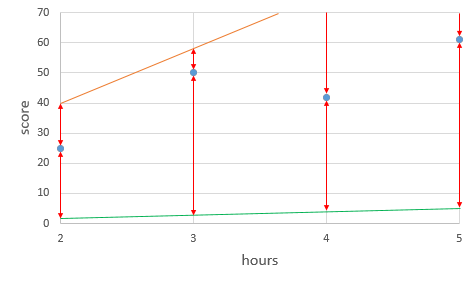

수정한 Hypothesis를 가지고 $W$ 와 $loss(W)$ 사이의 관계를 나타내면 아래와 같다 (cost = loss)

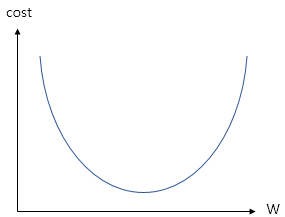

우리는 위 그래프에서 cost (=loss)가 최소가 되는 $W$값을 찾기 원한다

이를 위해 학습 시작 시 $W$값을 임의로 초기화 한 후, 최소가 되는 지점으로 향할 수 있게 점차 $W$값을 수정해 나간다

이를 그림으로 나타내면 아래와 같다

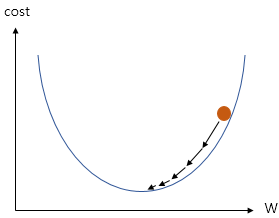

임의로 초기화 한 $W$값을 점차 최적의 $W$값에 다가 갈 수 있도록 사용하는 것이 Gradient Descent 이다

이는 말 그대로 경사(= 기울기)를 이용한 방법으로, loss가 최소가 되는 지점으로 다가갈 수록 $W$에 대한 미분값이 작아지는 것을 이용한 방법이다

즉, 현재 $W$값에서의 loss 함수 기울기를 구한 후, 이 기울기의 절대값이 작아지는 방향으로 조금씩 $W$값을 수정하는 작업을 반복하여 최적의 $W$값을 찾는다

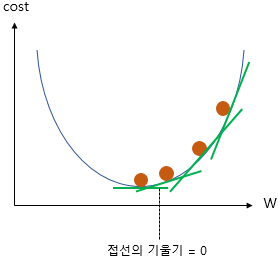

$기울기 = \frac{∂cost(W)}{∂W}$

위 그래프의 경우, 기울기가 음수이면 $W$값을 증가, 양수이면 $W$값을 감소시켜야 한다

이를 수식으로 나타내면 다음과 같이 쓸 수 있다



*   $W < 0$ : $W$ 증가\
$W := W - α × (음수 기울기)$

*   $W > 0$ : $W$ 감소\
$W := W - α × (양수 기울기)$

따라서,  $W := W - α\frac{∂}{∂W}loss(W)$

여기서 $\alpha$는 학습률(learning rate) 를 나타내는 임의의 양수이다

이 값은 한 스텝마다 $W$값을 변경할 때 얼마나 큰 폭으로 변경할지 결정해준다

이 값이 적절하지 않으면 학습에 너무 오랜 시간이 소요되거나, 혹은 아래와 같이 학습이 발산하는 경우가 생긴다

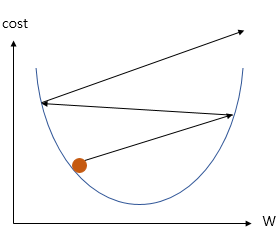

Hypothesis, loss function, Optimizer 는 풀고자 하는 문제에 따라 모두 다르다

선형 회귀의 경우 $H(x) = Wx + b$, MSE, GD 를 사용하지만 다른 문제에서는 다른 식들을 사용한다

### **2) PyTorch로 Linear Regression 구현하기**

In [ ]:
# 필요 패키지 import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Random seed 사용
torch.manual_seed(1)

In [ ]:
# 학습을 위한 변수 선언
x_train = torch.FloatTensor([[1], [2], [3]]) # 입력값 = x = 공부시간
y_train = torch.FloatTensor([[2], [4], [6]]) # 출력값 = y = 점수

In [ ]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


x_train의 값과 그 크기(3x1)를 확인 가능


In [ ]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


y_train의 값과 그 크기(3x1)를 확인 가능

In [ ]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함
W = torch.zeros(1, requires_grad=True) 
# 가중치 W를 출력
print(W) 

tensor([0.], requires_grad=True)


가중치 $W$가 0으로 초기화 되었고, requires_grad = True 를 통해 이 값이 학습을 통해 값이 변경되는 변수임을 선언

In [ ]:
# 편향 b 또한 초기화, 학습을 통해 값이 변하는 변수임을 선언
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


현재는 $W, b$ 모두 값이 0이므로, 직선의 식은 다음과 같다

$y = 0 \times x + 0$

다음으로 선형 회귀의 Hypothesis에 해당하는 직선의 방정식$(H(x) = Wx + b)$을 선언한다

In [ ]:
# 가설 식 세우기
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


이제 loss function을 선언한다


$loss(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$

In [ ]:
# loss function 선언하기 (torch.mean 을 사용해 평균값 계산)
loss = torch.mean((y_train - hypothesis) ** 2) 
print(loss)

tensor(18.6667, grad_fn=<MeanBackward0>)


다음으로 학습을 진행하기 위해 Optimizer (SGD)를 선언, 사용한다

SGD는 Stochastic Gradient Descent로, 경사 하강법의 일종이다

여기서 lr은 학습률 (위에서의 $\alpha$값)을 의미한다

In [ ]:
optimizer = optim.SGD([W, b], lr=0.01)

다음으로 학습을 시작하기 위하여 optimizer.zero_grad()를 이용해 기울기를 0으로 초기화한다

그 후 loss.backward()를 사용해 현재 $W, b$ 값에 대한 기울기를 계산할 수 있다

마지막으로 optimizer.step()을 사용하여 현재 계산된 기울기와 lr을 이용해 $W, b$ 값을 업데이트 해준다

In [ ]:
# gradient를 0으로 초기화
optimizer.zero_grad() 

In [ ]:
# 비용 함수를 미분하여 gradient 계산
loss.backward() 

In [ ]:
# W와 b를 업데이트
optimizer.step() 

위 코드를 모두 실행하면 단 한번만 기울기를 계산 후 $W, b$ 값을 업데이트한다

위 과정을 여러 번 반복하여 $W, b$ 값을 업데이트 해야 더욱 loss function이 최소값에 가까워 질 것이다

In [ ]:
print(W)

tensor([0.1867], requires_grad=True)


In [ ]:
print(b)

tensor([0.0800], requires_grad=True)


한 번의 업데이트 후 $W ,b = (0, 0)$ 에서 값이 업데이트 된 것을 확인할 수 있다

In [ ]:
#여러번 학습을 하기 위한 전체 코드

# 데이터 선언
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화 (가중치, 편향)
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs):

    # H(x) 계산
    hypothesis = x_train * W + b

    # loss 계산
    loss = torch.mean((y_train - hypothesis) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Loss: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), loss.item()
        ))
    if epoch == 1999:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Loss: {:.6f}'.format(
            epoch+1, nb_epochs, W.item(), b.item(), loss.item()
        ))

Epoch    0/2000 W: 0.187, b: 0.080 Loss: 18.666666
Epoch  100/2000 W: 1.746, b: 0.578 Loss: 0.048171
Epoch  200/2000 W: 1.800, b: 0.454 Loss: 0.029767
Epoch  300/2000 W: 1.843, b: 0.357 Loss: 0.018394
Epoch  400/2000 W: 1.876, b: 0.281 Loss: 0.011366
Epoch  500/2000 W: 1.903, b: 0.221 Loss: 0.007024
Epoch  600/2000 W: 1.924, b: 0.174 Loss: 0.004340
Epoch  700/2000 W: 1.940, b: 0.136 Loss: 0.002682
Epoch  800/2000 W: 1.953, b: 0.107 Loss: 0.001657
Epoch  900/2000 W: 1.963, b: 0.084 Loss: 0.001024
Epoch 1000/2000 W: 1.971, b: 0.066 Loss: 0.000633
Epoch 1100/2000 W: 1.977, b: 0.052 Loss: 0.000391
Epoch 1200/2000 W: 1.982, b: 0.041 Loss: 0.000242
Epoch 1300/2000 W: 1.986, b: 0.032 Loss: 0.000149
Epoch 1400/2000 W: 1.989, b: 0.025 Loss: 0.000092
Epoch 1500/2000 W: 1.991, b: 0.020 Loss: 0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 Loss: 0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Loss: 0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 Loss: 0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 Loss: 0.000008

위 코드에서는 for문을 사용해 총 2000번 $W, b$ 값을 업데이트 했다

업데이트를 반복할수록 Loss값이 작아지는 것을 확인 가능하다

여기서 Epoch는 전체 훈련 데이터셋이 학습에 몇 번 사용됐는지 나타낸다

위 코드에서는 매 학습 스탭마다 optimizer.zero_grad()를 통해 기울기를 초기화하였다

이는 PyTorch가 새롭게 미분을 통해 얻은 기울기를 이전 스탭에서 계산된 기울기 값에 누적시키기 때문이다

In [ ]:
# 값이 2인 스칼라 w 선언
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0


$z = 2w$ 를 변수$w$로 미분한 값은 $w$의 값에 상관없이 항상 2이다

그러나 위에서 확인 할 수 있듯 기울기 초기화를 진행하지 않으면 매 스탭마다 기울기가 누적된다

따라서 매 스탭마다 아래와 같이 기울기를 초기화 해줘야 제대로 기울기를 구할 수 있다

In [ ]:
# 값이 2인 스칼라 w 선언
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
opt = optim.SGD([w], lr=0.01)
for epoch in range(nb_epochs):

  z = 2*w

  opt.zero_grad()
  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 2.0


가중치 $W$나 편향 $b$를 선언 할 때 requires_grad=True 를 사용했다

또한 backward()함수를 통해 loss function 을 미분한 값을 구할 수 있었다

이는 PyTorch가 제공하는 자동미분 (Autograd)를 사용한 것이다

현재 사용중인 loss function이나 Hypothesis는 어렵지 않지만, 모델이 복잡해질수록 직접 이 식들을 미분하는 것은 힘들다

PyTorch는 이 Autograd를 이용해 미분값을 쉽게 구할 수 있다

In [ ]:
# 값 2인 스칼라 텐서 w 선언, requires_grad = True를 하면 w.grad에 w에 대한 미분값이 저장된다
w = torch.tensor(2.0, requires_grad=True)

# 미분 할 수식 선언
z = 2*(w**2) + 5    # z = 2(w^2) + 5

# backward() 사용하여 w에 대한 기울기 계산
z.backward()

# w = 2 일 때 z를 w로 미분 한 값을 계산 가능하다 
print('수식 z를 w로 미분한 값 (w=2) : {}'.format(w.grad))

수식 z를 w로 미분한 값 (w=2) : 8.0


### **3) PyTorch로 Multivariable Linear Regression 구현하기**

이번에는 입력 변수가 여러개인 경우의 선형 회귀를 진행해 보자

아래와 같이 학생 5명에 대해 3번의 퀴즈점수와 기말고사 점수가 있다고 하자

이 때 3번의 퀴즈를 주면 기말 점수를 예측하기 위해 선형회귀 모델을 만들 수 있다

변수가 여러개이므로 하나하나 직접 선언하는 것 보다는 행렬 연산을 통해 계산하는 것이 편하다

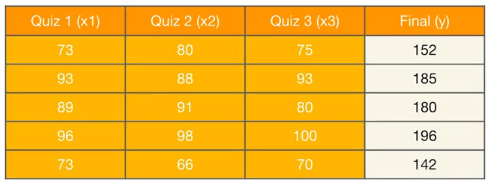

이 경우 Hypothesis는 $H(x) = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + b$ 가 된다

이를 행렬 연산으로 나타내면 아래와 같다

$\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ \\
      x_{21}\ x_{22}\ x_{23}\ \\
      x_{31}\ x_{32}\ x_{33}\ \\
      x_{41}\ x_{42}\ x_{43}\ \\
      x_{51}\ x_{52}\ x_{53}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{1} \\
      w_{2} \\
      w_{3} \\
    \end{array}
  \right)
+
\left(
    \begin{array}{c}
      b \\
      b \\
      b \\
      b \\
      b \\
    \end{array}
  \right)
 \ =
\left(
    \begin{array}{c}
      x_{11}w_{1}+ x_{12}w_{2}+ x_{13}w_{3} + b\ \\
      x_{21}w_{1}+ x_{22}w_{2}+ x_{23}w_{3} + b\ \\
      x_{31}w_{1}+ x_{32}w_{2}+ x_{33}w_{3} + b\ \\
      x_{41}w_{1}+ x_{42}w_{2}+ x_{43}w_{3} + b\ \\
      x_{51}w_{1}+ x_{52}w_{2}+ x_{53}w_{3} + b\ \\
    \end{array}
  \right)$
  

즉, $H(X) = XW + B$ 로 쓸 수 있다

이를 PyTorch로 구현하면 아래와 같다

In [ ]:
# 훈련 데이터를 행렬식으로 선언
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

입력 데이터는 5x3 행렬, 출력 데이터는 5x1 행렬 (=벡터) 임을 알 수 있다

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [ ]:
# 가중치와 편향 선언 및 초기화
W = torch.zeros((3, 1), requires_grad=True) # 가중치는 3x1 행렬(=벡터)
b = torch.zeros(1, requires_grad=True)      # 편향 선언

In [ ]:
# 행렬 곱을 이용하여 hypothesis 식 선언
hypothesis = x_train.matmul(W) + b

위 내용을 토대로 전체 학습 코드를 적으면 아래와 같다

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # loss 계산
    loss = torch.mean((hypothesis - y_train) ** 2)

    # loss로 H(x) 개선
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} loss: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), loss.item()
    ))
    print('Weight: w1={:.4f} ,w2={:.4f} w3={:.4f} Bias: {:.6f}'.format(
        W.squeeze().detach()[0], W.squeeze().detach()[1], W.squeeze().detach()[2], b.item()
    ))
    print("\n")

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) loss: 29661.800781
Weight: w1=0.2940 ,w2=0.2936 w3=0.2902 Bias: 0.003420


Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) loss: 9537.694336
Weight: w1=0.4607 ,w2=0.4601 w3=0.4546 Bias: 0.005359


Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) loss: 3069.590088
Weight: w1=0.5553 ,w2=0.5545 w3=0.5478 Bias: 0.006459


Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) loss: 990.670288
Weight: w1=0.6090 ,w2=0.6080 w3=0.6006 Bias: 0.007083


Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) loss: 322.481873
Weight: w1=0.6394 ,w2=0.6383 w3=0.6305 Bias: 0.007437


Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) loss: 107.717064
Weight: w1=0.6567 ,w2=0.6556 w3=0.6473 Bias: 0.007639


Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]

### **4) nn.Module 사용하여 Linear Regression 구현하기**

많은 수의 유명한 모델들, 오차 함수들은 Pytorch 패키지 내부에 이미 잘 구현되어 있다

따라서 위에서 한 것 처럼 hypothesis, loss 등을 직접 선언 할 필요 없이 이미 구현된 기능을 가져와 학습을 진행 할 수 있다

##### **4-1) Linear Regression 구현**

In [ ]:
# 필요한 패키지 import
import torch
import torch.nn as nn
import torch.nn.functional as F

# 랜덤시드 선언
torch.manual_seed(1)

In [ ]:
# 학습 데이터 선언
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [ ]:
# 선형 회귀 모델은 Linear()로 불러 올 수 있다
# 모델 선언 및 초기화, 단순 선형 회귀이므로 input_dim=1, output_dim=1
model = nn.Linear(1,1)

이렇게 선언한 model에는 자동으로 가중치 $W$와 편향 $b$가 들어가 있다

이는 model.parameters()로 불러 올 수 있으며, 다음과 같이 확인 가능하다

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


여기서 첫 값이 $W$ 두번째 값이 $b$이고, 현재는 랜덤으로 초기화된 값이 들어가 있다

In [ ]:
# 학습을 위해 optimizer 설정
# 경사 하강법 SGD를 사용하고 learning rate는 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

따라서 전체 학습 코드는 아래와 같다

In [ ]:
# 필요한 패키지 import
import torch
import torch.nn as nn
import torch.nn.functional as F

# 랜덤시드 선언
torch.manual_seed(1)

# 학습 데이터 선언
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 선형 회귀 모델은 Linear()로 불러 올 수 있다
# 모델 선언 및 초기화, 단순 선형 회귀이므로 input_dim=1, output_dim=1
model = nn.Linear(1,1)

# 학습을 위해 optimizer 설정
# 경사 하강법 SGD를 사용하고 learning rate는 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs):

    # H(x) 계산 (forward 연산)
    prediction = model(x_train)

    # loss 계산
    loss = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # loss로 H(x) 개선

    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    loss.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
      print('Epoch {:4d}/{} W: {:.6f}, b: {:.6f} loss: {:.6f}'.format(
          epoch, nb_epochs, list(model.parameters())[0].squeeze().detach(), list(model.parameters())[1].squeeze().detach(), loss.item()
      ))
    if epoch == 1999:
      print('Epoch {:4d}/{} W: {:.6f}, b: {:.6f} loss: {:.6f}'.format(
          epoch+1, nb_epochs, list(model.parameters())[0].squeeze().detach(), list(model.parameters())[1].squeeze().detach(), loss.item()
      ))

Epoch    0/2000 W: 0.671494, b: -0.373161 loss: 13.103541
Epoch  100/2000 W: 1.938784, b: 0.139133 loss: 0.002791
Epoch  200/2000 W: 1.951886, b: 0.109375 loss: 0.001724
Epoch  300/2000 W: 1.962178, b: 0.085978 loss: 0.001066
Epoch  400/2000 W: 1.970268, b: 0.067587 loss: 0.000658
Epoch  500/2000 W: 1.976628, b: 0.053129 loss: 0.000407
Epoch  600/2000 W: 1.981628, b: 0.041765 loss: 0.000251
Epoch  700/2000 W: 1.985558, b: 0.032831 loss: 0.000155
Epoch  800/2000 W: 1.988647, b: 0.025808 loss: 0.000096
Epoch  900/2000 W: 1.991076, b: 0.020287 loss: 0.000059
Epoch 1000/2000 W: 1.992985, b: 0.015948 loss: 0.000037
Epoch 1100/2000 W: 1.994485, b: 0.012536 loss: 0.000023
Epoch 1200/2000 W: 1.995665, b: 0.009855 loss: 0.000014
Epoch 1300/2000 W: 1.996592, b: 0.007747 loss: 0.000009
Epoch 1400/2000 W: 1.997321, b: 0.006090 loss: 0.000005
Epoch 1500/2000 W: 1.997894, b: 0.004787 loss: 0.000003
Epoch 1600/2000 W: 1.998345, b: 0.003763 loss: 0.000002
Epoch 1700/2000 W: 1.998698, b: 0.002959 loss:

이제 위에서 학습된 모델을 이용해 x=4 일 때 y값을 예측해보자



In [ ]:
# 임의의 입력 데이터 x = 4를 선언
test_x =  torch.FloatTensor([[4.0]])

# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(test_x) # forward 연산

# y = 2x 이므로 x = 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 x = 4일 때의 예측값 :", pred_y.detach()) 

훈련 후 x = 4일 때의 예측값 : tensor([[7.9989]])


* $H(x)$식에서 입력 $x$로부터 예측된 $y$를 얻는 것을 forward 연산이라고 한다
* 학습 전, prediction = model(x_train)은 x_train으로부터 예측값을 리턴하므로 forward 연산이다
* 학습 후, pred_y = model(test_x)는 임의의 입력값 test_x로부터 모델의 예측값을 반환하므로 forward 연산이다
* 학습 과정에서 loss function를 미분하여 기울기를 구하는 것을 backward 연산이라고 한다
* loss.backward()는 loss function으로부터 기울기를 구하라는 의미이며 backward 연산이다

##### **4-1) Multivariable Linear Regression 구현**

마찬가지 방법으로, nn.Linear()를 이용하여 입력 변수가 3개, 출력 변수가 1개인 다중 선형 회귀 또한 가능하다

In [ ]:
# 필요 모듈 import
import torch
import torch.nn as nn
import torch.nn.functional as F

# 랜덤 시드 선언
torch.manual_seed(1)

# 학습 데이터 선언
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델을 선언 및 초기화
# 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

# 모델 내부에 선언, 랜덤으로 초기화 된 3개의 weight와 1개의 bias 확인 가능
print(list(model.parameters()))


[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [ ]:
list(model.parameters())[0].squeeze().detach()[0].item()

0.2974873483181

In [ ]:
# 필요 모듈 import
import torch
import torch.nn as nn
import torch.nn.functional as F

# 랜덤 시드 선언
torch.manual_seed(1)

# 학습 데이터 선언
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델을 선언 및 초기화
# 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

# 모델 내부에 선언, 랜덤으로 초기화 된 3개의 weight와 1개의 bias 확인 가능
print(list(model.parameters()))
print("\n")
# optimizer 선언
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

# 정한 epoch 만큼 학습 후 결과 출력
nb_epochs = 2000
for epoch in range(nb_epochs):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # loss 계산
    loss = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # loss로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # loss 함수를 미분하여 gradient 계산
    loss.backward()
    # W와 b를 업데이트
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
      print('Epoch {:4d}/{} loss: {:.6f}'.format(
          epoch, nb_epochs, loss.item()
      ))
      print('w1: {:.6f}, w2: {:.6f}, w3: {:.6f}, b: {:.6f}'.format(
          list(model.parameters())[0].squeeze().detach()[0].item(), list(model.parameters())[0].squeeze().detach()[1].item(), list(model.parameters())[0].squeeze().detach()[2].item(), list(model.parameters())[1].detach().item()
      ))
      print("\n")
    if epoch == 1999:
      print('Epoch {:4d}/{} loss: {:.6f}'.format(
          epoch+1, nb_epochs, loss.item()
      ))
      print('w1: {:.6f}, w2: {:.6f}, w3: {:.6f}, b: {:.6f}'.format(
          list(model.parameters())[0].squeeze().detach()[0].item(), list(model.parameters())[0].squeeze().detach()[1].item(), list(model.parameters())[0].squeeze().detach()[2].item(), list(model.parameters())[1].detach().item()
      ))
      print("\n")

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


Epoch    0/2000 loss: 31667.597656
w1: 0.601220, w2: 0.048619, w3: 0.195340, b: 0.274523


Epoch  100/2000 loss: 0.225993
w1: 0.986909, w2: 0.435802, w3: 0.585671, b: 0.279073


Epoch  200/2000 loss: 0.223911
w1: 0.986259, w2: 0.436978, w3: 0.585152, b: 0.279130


Epoch  300/2000 loss: 0.221941
w1: 0.985630, w2: 0.438124, w3: 0.584640, b: 0.279186


Epoch  400/2000 loss: 0.220059
w1: 0.985024, w2: 0.439242, w3: 0.584134, b: 0.279243


Epoch  500/2000 loss: 0.218271
w1: 0.984439, w2: 0.440333, w3: 0.583634, b: 0.279300


Epoch  600/2000 loss: 0.216575
w1: 0.983875, w2: 0.441398, w3: 0.583141, b: 0.279356


Epoch  700/2000 loss: 0.214950
w1: 0.983330, w2: 0.442436, w3: 0.582653, b: 0.279413


Epoch  800/2000 loss: 0.213413
w1: 0.982805, w2: 0.443449, w3: 0.582171, b: 0.279469


Epoch  900/2000 loss: 0.211952
w1: 0.982299, w2: 0.444438, w3: 0.5816

위에서 학습한 모델에 3번의 퀴즈 점수를 입력하여 기말 점수를 예측해보자

In [ ]:
# 임의의 입력 (3번의 퀴즈 점수) [73, 80, 75]를 선언
test_x =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(test_x) 
print("훈련 후 입력이 73, 80, 75일 때의 기말 점수 예측값 :", pred_y.squeeze().detach())

훈련 후 입력이 73, 80, 75일 때의 기말 점수 예측값 : tensor(151.2305)


이 학습의 경우, lr 값이 1e-4가 되면 학습이 발산한다는 것을 아래와 같이 확인 할 수 있다

In [ ]:
# 필요 모듈 import
import torch
import torch.nn as nn
import torch.nn.functional as F

# 랜덤 시드 선언
torch.manual_seed(1)

# 학습 데이터 선언
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델을 선언 및 초기화
# 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

# 모델 내부에 선언, 랜덤으로 초기화 된 3개의 weight와 1개의 bias 확인 가능
print(list(model.parameters()))
print("\n")
# optimizer 선언
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4) ##### lr값이 커서 학습 발산

# 정한 epoch 만큼 학습 후 결과 출력
nb_epochs = 100
for epoch in range(nb_epochs):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # loss 계산
    loss = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # loss로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # loss 함수를 미분하여 gradient 계산
    loss.backward()
    # W와 b를 업데이트
    optimizer.step()

    # 10번마다 로그 출력
    if epoch % 10 == 0:
      print('Epoch {:4d}/{} loss: {:.6f}'.format(
          epoch, nb_epochs, loss.item()
      ))
      print('w1: {:.6f}, w2: {:.6f}, w3: {:.6f}, b: {:.6f}'.format(
          list(model.parameters())[0].squeeze().detach()[0].item(), list(model.parameters())[0].squeeze().detach()[1].item(), list(model.parameters())[0].squeeze().detach()[2].item(), list(model.parameters())[1].detach().item()
      ))
      print("\n")
    if epoch == 99:
      print('Epoch {:4d}/{} loss: {:.6f}'.format(
          epoch+1, nb_epochs, loss.item()
      ))
      print('w1: {:.6f}, w2: {:.6f}, w3: {:.6f}, b: {:.6f}'.format(
          list(model.parameters())[0].squeeze().detach()[0].item(), list(model.parameters())[0].squeeze().detach()[1].item(), list(model.parameters())[0].squeeze().detach()[2].item(), list(model.parameters())[1].detach().item()
      ))
      print("\n")

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


Epoch    0/100 loss: 31667.597656
w1: 3.334811, w2: 2.779658, w3: 2.960735, b: 0.306319


Epoch   10/100 loss: 1360449547272192.000000
w1: 486522.375000, w2: 486037.156250, w3: 492179.875000, b: 5658.153320


Epoch   20/100 loss: 58445736974251639435165696.000000
w1: 100841005056.000000, w2: 100740538368.000000, w3: 102013714432.000000, b: 1172704384.000000


Epoch   30/100 loss: 2510863907554234082177378527622463488.000000
w1: 20901254335037440.000000, w2: 20880428038619136.000000, w3: 21144317271736320.000000, b: 243065721716736.000000


Epoch   40/100 loss: inf
w1: 4332189529328031105024.000000, w2: 4327874236460080037888.000000, w3: 4382569890984541290496.000000, b: 50380084579579985920.000000


Epoch   50/100 loss: inf
w1: 897930464175505062733283328.000000, w2: 897035944661882739156320256.000000, w3: 908372723273774270873862144.000000, b:

### **5) Class를 사용하여 Linear Regression 구현하기**

##### **5-1) Linear Regression 구현**

In [ ]:
# 필요 패키지
import torch
import torch.nn as nn
import torch.nn.functional as F

# 랜덤 시드
torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 단순 선형 회귀를 구현하는 class 선언
# 이 class는 nn.Module을 상속 받는다 (즉, nn.Module 내부 기능들을 사용 가능하다)
# 생성자에서 super()를 통해 초기화를 진행하면 nn.Module 클래스의 속성을 가지고 초기화된다
# 본 class에서 사용 가능한 forward 연산을 아래와 같이 구현 가능하다
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) ### 단순 선형 회귀 모델

    def forward(self, x):
        return self.linear(x)

# 위에서 선언한 class 를 이용하여 모델 선언
model = LinearRegressionModel()

# optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 연산
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

##### **5-2) Multivariable Linear Regression 구현**

In [ ]:
# 필요 패키지
import torch
import torch.nn as nn
import torch.nn.functional as F

# 랜덤 시드
torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 다변수 선형 회귀를 구현하는 class 선언
# 이 class는 nn.Module을 상속 받는다 (즉, nn.Module 내부 기능들을 사용 가능하다)
# 생성자에서 super()를 통해 초기화를 진행하면 nn.Module 클래스의 속성을 가지고 초기화된다
# 본 class에서 사용 가능한 forward 연산을 아래와 같이 구현 가능하다
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) ### 다변수 선형 회귀 모델

    def forward(self, x):
        return self.linear(x)

# 위에서 선언한 class 를 이용하여 모델 선언
model = MultivariateLinearRegressionModel()

# optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

# **Mini Batch와 Data Load**

### **1) Batch, Dataset, DataLoader**

다중 선형 회귀에서 사용한 데이터는 다음과 같았다

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

여기서 입력 데이터는 총 5개 (학생 5명의 퀴즈 점수들) 이다

실제로 모델을 학습 할 때는 이보다 훨씬 많은 양의 데이터를 사용한다 (보통 ~수십만개 이상의 데이터)

지금까지 모델 학습 시 위의 5개 데이터를 한번에 모델에 집어넣어 학습을 하였으나, 데이터의 양이 늘어나면 GPU의 메모리 한계 때문에 계산이 불가능하거나, 가능하더라도 학습에 아주 많은 시간이 요구된다

따라서 전체 데이터를 작은 데이터셋들(Mini Batch)로 나눠서 학습을 진행하는 편이 효율적이다

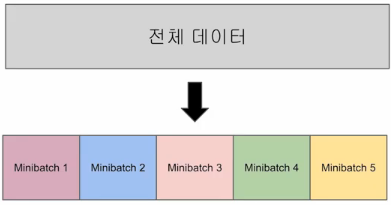

* 에포크(Epoch)는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말한다

* 미니 배치 학습에서는 미니 배치의 개수만큼 경사 하강법을 수행해야 전체 데이터가 한 번 전부 사용되어 1 에포크(Epoch)가 된다

* 미니 배치의 개수는 미니 배치의 크기를 몇으로 하느냐에 따라서 달라지는데, 미니 배치의 크기를 배치 크기(batch size)라고 한다

* 전체 데이터에 대해서 한 번에 경사 하강법을 수행하는 방법을 '배치 경사 하강법'이라고 한다\
배치 경사 하강법은 학습 진행 시 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 안정적이지만, 계산량이 너무 많이 든다

* 미니 배치 단위로 경사 하강법을 수행하는 방법을 '미니 배치 경사 하강법'이라고 한다\
미니 배치 경사 하강법은 학습 진행 시 전체 데이터의 일부만을 보고 수행하므로 최적값으로 수렴하는 과정에서 값이 조금 헤매기도 하지만 훈련 속도가 빠르다

* 배치 크기는 보통 2의 제곱수를 사용한다 ex) 2, 4, 8, 16, 32, 64...\
(CPU와 GPU의 메모리가 2의 배수이므로 배치크기가 2의 제곱수일 경우에 데이터 송수신의 효율을 높일 수 있다)

Mini Batch와 batch size에 대해 이해 한 후, 이터레이션 (iteration) 을 정의 할 수 있다

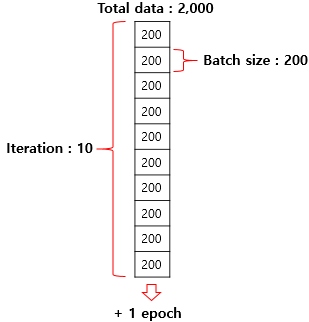

Iteration은 한 번의 epoch 내에서 가중치 $W$와 편향 $b$가 업데이트 되는 횟수이다

예를 들어 전체 데이터가 2000개이고, batch size = 200 이라면 한 에폭에 10번의 학습 step이 존재하고, 각 step이 완료될 때 마다 $W$와 $b$의 업데이트가 이뤄진다

PyTorch는 이런 Mini batch 학습을 지원하는 도구들 (Dataset, DataLoader 등) 을 제공한다

기본적으로 학습에 사용할 Dataset을 정의 한 후, 이를 DataLoader를 통해 모델에 전달한다

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# 데이터셋, 데이터로더 사용을 위해 패키지 import
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [ ]:
#TensorDataset에 전달 할 데이터

x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [ ]:
# 위에서 선언한 데이터를 TensorDataset에 입력하고 dataset 이라는 이름으로 저장

dataset = TensorDataset(x_train, y_train)

위와 같이 TensorDataset을 만들었다면, 이제 이를 DataLoader를 통해 원하는 batch size로 나눠서 모델에 전달 할 수 있다

이 때 shuffle=True 를 통해 각 Epoch마다 모델에 전달되는 데이터 셋의 순서를 랜덤하게 섞어 줄 수 있다

In [ ]:
# 위에서 저장한 dataset을 DataLoader에 전달, 순서를 섞기 위해 shuffle=True 사용
# batch_size = 2, 따라서 매 epoch마다 5개의 전체 데이터는 2, 2, 1개의 mini batch로 쪼개져서 모델에 전달된다
# 즉, 각 epoch마다 총 3번의 학습 step이 존재한다
dataloader = DataLoader(dataset, batch_size=2, shuffle=True) 

전체 학습 코드는 아래와 같다

In [ ]:
# 전체 학습 코드

import torch
import torch.nn as nn
import torch.nn.functional as F

# 데이터셋, 데이터로더 사용을 위해 패키지 import
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

#TensorDataset에 전달 할 데이터

x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 위에서 선언한 데이터를 TensorDataset에 입력하고 dataset 이라는 이름으로 저장

dataset = TensorDataset(x_train, y_train)

# 위에서 저장한 dataset을 DataLoader에 전달, 순서를 섞기 위해 shuffle=True 사용
# batch_size = 2, 따라서 매 epoch마다 5개의 전체 데이터는 2, 2, 1개의 mini batch로 쪼개져서 모델에 전달된다
# 즉, 각 epoch마다 총 3번의 학습 step이 존재한다
dataloader = DataLoader(dataset, batch_size=2, shuffle=True) 

# 모델, optimizer 선언
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

# 지정한 epoch만큼 학습 진행
# 각 epoch마다 3번의 step 존재, 즉 iteration = 3
# 따라서 가중치와 편향은 매 epoch마다 3번씩 업데이트 된다
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} step {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))
  print("\n")

Epoch    0/20 step 1/3 Cost: 37210.574219
Epoch    0/20 step 2/3 Cost: 16463.394531
Epoch    0/20 step 3/3 Cost: 2130.966309


Epoch    1/20 step 1/3 Cost: 1196.248047
Epoch    1/20 step 2/3 Cost: 607.885376
Epoch    1/20 step 3/3 Cost: 302.890442


Epoch    2/20 step 1/3 Cost: 45.500126
Epoch    2/20 step 2/3 Cost: 19.989773
Epoch    2/20 step 3/3 Cost: 0.266310


Epoch    3/20 step 1/3 Cost: 3.424530
Epoch    3/20 step 2/3 Cost: 38.331135
Epoch    3/20 step 3/3 Cost: 5.501321


Epoch    4/20 step 1/3 Cost: 1.433258
Epoch    4/20 step 2/3 Cost: 28.980219
Epoch    4/20 step 3/3 Cost: 23.308434


Epoch    5/20 step 1/3 Cost: 10.520474
Epoch    5/20 step 2/3 Cost: 13.878951
Epoch    5/20 step 3/3 Cost: 18.593840


Epoch    6/20 step 1/3 Cost: 29.622368
Epoch    6/20 step 2/3 Cost: 8.460442
Epoch    6/20 step 3/3 Cost: 12.447860


Epoch    7/20 step 1/3 Cost: 15.158208
Epoch    7/20 step 2/3 Cost: 15.029005
Epoch    7/20 step 3/3 Cost: 16.188663


Epoch    8/20 step 1/3 Cost: 22.005436
Ep

위에서 학습한 모델을 사용해 임의의 입력에 대한 출력값을 예측 할 수 있다

In [ ]:
# 임의의 입력 [73, 80, 75]를 선언
test_x =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(test_x) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y.squeeze().detach()) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor(156.5337)


### **2) Custom Dataset 을 사용한 학습**

PyTorch에서 기본적으로 제공하는 Dataset 이외에도, 본인의 학습 데이터에 맞도록 수정한 Custom Dataset을 만들어 쓰는 경우도 있다

사실 연습 이외에 실제로 모델 학습을 한다면 custom dataset을 더 많이 쓴다

Custom Dataset은 PyTorch의 Dataset을 상속하며, 기본적으로 아래의 뼈대가 필요하다

In [ ]:
class CustomDataset(torch.utils.data.Dataset): 
  def __init__(self):
  # 데이터셋의 전처리를 해주는 부분

  def __len__(self):
  # 데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분
  # len(dataset)을 했을 때 데이터셋의 크기를 리턴할 len

  def __getitem__(self, idx): 
  # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
  # dataset[idx]을 했을 때 idx번째 샘플을 가져오도록 하는 인덱싱을 위한 get_item

직접 Custom dataset을 만들어 선형 회귀를 진행해 보자

In [ ]:
# 필요한 모듈 import

import torch
import torch.nn.functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
# Dataset 상속하는 custom dataset 클래스 선언
# Dataset을 상속한다는 것은 Dataset 클래스의 기능들을 사용 할 수 있다는 뜻

class CustomDataset(Dataset): 
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]
    # 이 경우 따로 데이터를 전처리 할 필요가 없다
    # 따라서 사용할 입력, 출력 데이터를 그대로 선언해준다

  # 총 데이터의 개수를 반환하도록 정의
  def __len__(self): 
    return len(self.x_data)

  # 인덱스(idx)를 입력받아 그에 맵핑되는 입,출력 데이터를 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [ ]:
# 위에서 선언한 custom dataset을 이용해 data loader로 전달

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

따라서 전체 학습 코드는 아래와 같다

In [ ]:
# 필요한 모듈 import

import torch
import torch.nn.functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Dataset 상속하는 custom dataset 클래스 선언
# Dataset을 상속한다는 것은 Dataset 클래스의 기능들을 사용 할 수 있다는 뜻

class CustomDataset(Dataset): 
  def __init__(self):
    self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]
    # 이 경우 따로 데이터를 전처리 할 필요가 없다
    # 따라서 사용할 입력, 출력 데이터를 그대로 선언해준다

  # 총 데이터의 개수를 반환하도록 정의
  def __len__(self): 
    return len(self.x_data)

  # 인덱스(idx)를 입력받아 그에 맵핑되는 입,출력 데이터를 Tensor 형태로 리턴
  def __getitem__(self, idx): 
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

# 위에서 선언한 custom dataset을 이용해 data loader로 전달

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# 모델, optimizer 선언
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

# 지정한 epoch만큼 전체 데이터셋 반복 학습

nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} step {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))
  print('\n')

위에서 학습한 모델에 임의의 입력값을 넣어 예측값 출력 가능

In [ ]:
# 임의의 입력 [73, 80, 75]를 선언
test_x =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(test_x) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y.squeeze().detach()) 